# (Dataset Exploration Title)
## by (Ahmed Almalki)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from zipfile import ZipFile
from urllib.request import urlopen  
import os

In [2]:
# # gathering flights details for 3 years (2006 - 2008) 

# df = pd.DataFrame()
# for i in range(6,9):
#     url = 'http://stat-computing.org/dataexpo/2009/20{:02d}.csv.bz2'.format(i)
#     file_name = '20{:02d}.bz2'.format(i)
    
#     url_object = urlopen(url)
#     output = open(file_name, 'wb')
#     output.write(url_object.read())
#     output.close()
    
#     df = df.append(pd.read_csv(file_name), ignore_index=True)
#     os.remove(file_name)

> The plan was to gather data for three years (2006, 2007 & 2008). However it is very rendering time expensive because of the detaset size which is (21,604,865) observations. So, the dataset will be exclusive on 2008 which is (7,009,728) observations.

In [3]:
df = pd.read_csv('2008.csv')
df_airports = pd.read_csv('airports.csv')

In [4]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [5]:
df_airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [8]:
# df['Date'] = pd.to_datetime(df.Year.astype('str').str.zfill(4) + \
#                             df.Month.astype('str').str.zfill(2) + \
#                             df.DayofMonth.astype('str').str.zfill(2)
#                             , format='%Y%m%d')


| Name	|   Description |
| ---|---|
| Year	|   1987-2008 |
| Month	|   1-12 |
| DayofMonth	|   1-31 |
| DayOfWeek	|   1 (Monday) - 7 (Sunday) |
| DepTime	|   actual departure time (local, hhmm) |
| CRSDepTime	|   scheduled departure time (local, hhmm) |
| ArrTime	|   actual arrival time (local, hhmm) |
| CRSArrTime	|   scheduled arrival time (local, hhmm) |
| UniqueCarrier	|   unique carrier code |
| FlightNum	|   flight number |
| TailNum	|   plane tail number |
| ActualElapsedTime	|   in minutes |
| CRSElapsedTime	|   in minutes |
| AirTime	|   in minutes |
| ArrDelay	|   arrival delay, in minutes |
| DepDelay	|   departure delay, in minutes |
| Origin	|   origin IATA airport code |
| Dest	|   destination IATA airport code |
| Distance	|   in miles |
| TaxiIn	|   taxi in time, in minutes |
| TaxiOut	|   taxi out time in minutes |
| Cancelled	|   was the flight cancelled? |
| CancellationCode	|   reason for cancellation (A = carrier, B = weather, C = NAS, D = security) |
| Diverted	|   1 = yes, 0 = no |
| CarrierDelay	|   in minutes |
| WeatherDelay	|   in minutes |
| NASDelay	|   in minutes |
| SecurityDelay	|   in minutes |
| LateAircraftDelay	|   in minutes |

In [9]:
# df_2008['DepTime'] = df_2008.DepTime.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
# df_2008['CRSDepTime'] = df_2008.CRSDepTime.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
# df_2008['ArrTime'] = df_2008.ArrTime.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
# df_2008['CRSArrTime'] = df_2008.CRSArrTime.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)

In [10]:
# df_2008.loc[df_2008.DepTime == '2400','DepTime'] = '0000'

### What is the structure of your dataset?

> There are 7,009,728 flight observations with 30 features in 2008.

### What is/are the main feature(s) of interest in your dataset?

> delayed and canceled flights in terms fo carriers, airports & time.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> - `ArrDelay`, `DepDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`.
> - `Cancelled` & `CancellationCode`.
> - `Month`, `DayofMonth`, `DayOfWeek`, `DepTime`, `CRSDepTime`, `ArrTime`, `CRSArrTime`, `UniqueCarrier`, `Origin` & `Dest`.


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

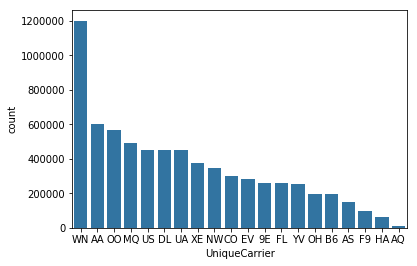

In [11]:
# plt.figure(figsize=[15,4])
color = sb.color_palette()[0]
carrier_sort = df.UniqueCarrier.value_counts().index
sb.countplot(data=df, x='UniqueCarrier', color=color, order=carrier_sort)

> There are differentiation of flights quantity among airlines.

<BarContainer object of 10 artists>

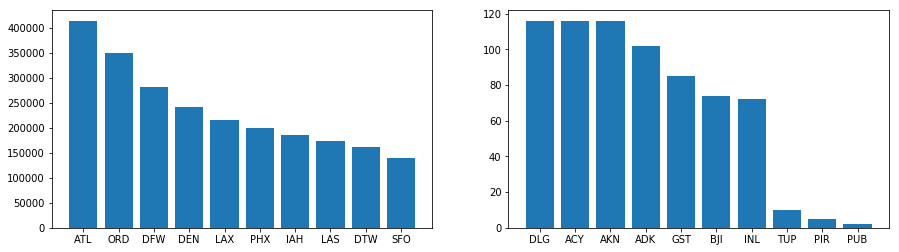

In [12]:
plt.figure(figsize=[15,4])
origins = df.Origin.value_counts()

plt.subplot(1,2,1)
plt.bar(origins.head(10).index, height=origins.head(10).values)

plt.subplot(1,2,2)
plt.bar(origins.tail(10).index, height=origins.tail(10).values)

<BarContainer object of 10 artists>

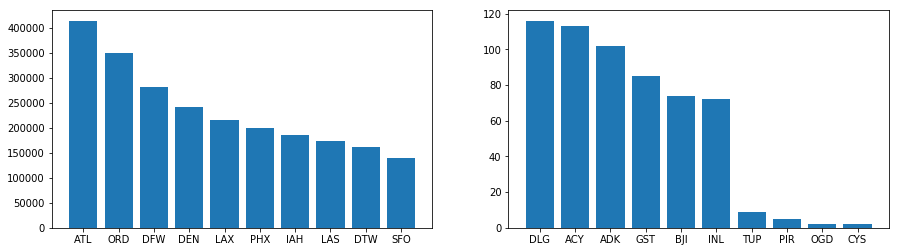

In [13]:
plt.figure(figsize=[15,4])
destinations = df.Dest.value_counts()

plt.subplot(1,2,1)
plt.bar(destinations.head(10).index, height=destinations.head(10).values)

plt.subplot(1,2,2)
plt.bar(destinations.tail(10).index, height=destinations.tail(10).values)

([<matplotlib.axis.XTick at 0x1a179ab898>,
 <a list of 11 Text xticklabel objects>)

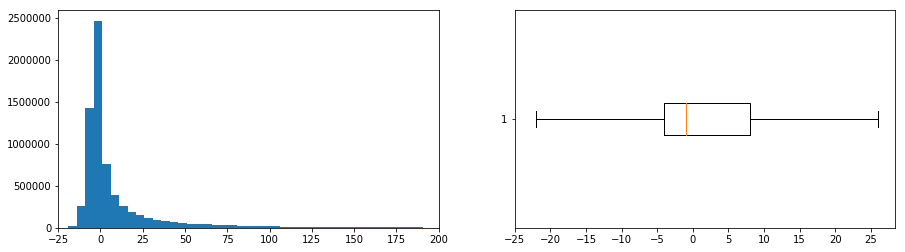

In [14]:
plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
step = 5
bin_edges = np.arange(df.DepDelay.min()-step, df.DepDelay.max()+step, step)
plt.hist(df.DepDelay, bins=bin_edges)
plt.xlim(-25,200)
# plt.xticks(np.arange(-25,200,25))

plt.subplot(1,2,2)
plt.boxplot(x=df[pd.notnull(df.DepDelay)].DepDelay, vert=False, showfliers=False)
plt.xticks(np.arange(-25,30, 5))

> There are delayed departures as well as earlier departures & the most of them are between -25 to 25 min differ of the scheduled time. However, there is a flight has been delayed more than 1 day and 17 hours, and also there is a flight had be earlier around 9 hours of the schedule time.

In [15]:
df2 = pd.merge(df, df_airports, left_on='Origin', right_on='iata')

7009728
7009728


In [ ]:
plt.figure(figsize=[15,3])
sample = df2.sample(10000)

def correct_dep_delay(x):
    if(x>25): 
        x=25
    elif(x<-25):
        x=-25
    return x

sample.DepDelay = sample.DepDelay.apply(correct_dep_delay)

plt.scatter(x=sample.long, y=sample.lat, alpha=.5, c=sample.DepDelay)
plt.colorbar()

([<matplotlib.axis.XTick at 0x1a5f56b4e0>,
 <a list of 19 Text xticklabel objects>)

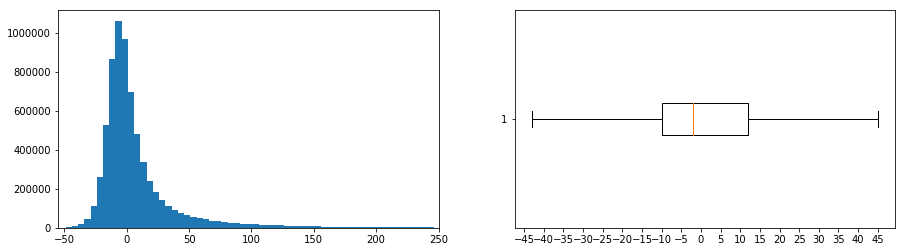

In [320]:
plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
step = 5
bin_edges = np.arange(df.ArrDelay.min()-step, df.ArrDelay.max()+step, step)
plt.hist(df.ArrDelay, bins=bin_edges)
plt.xlim(-55,250)

plt.subplot(1,2,2)
plt.boxplot(x=df[pd.notnull(df.ArrDelay)].ArrDelay, vert=False, showfliers=False)
plt.xticks(np.arange(-45,50, 5))

> There are delayed arrival as well as earlier arrival & the most of them are between -45 to 45 min differ of the scheduled time.

([<matplotlib.patches.Wedge at 0x1a5ba78b38>,
 [Text(-1.0979140168911459, 0.06771123624590586, ''),
  Text(1.0979140188722651, -0.06771120412274123, '')],
 [Text(-0.598862191031534, 0.03693340158867592, '98.04%'),
  Text(0.5988621921121445, -0.03693338406694976, '1.96%')])

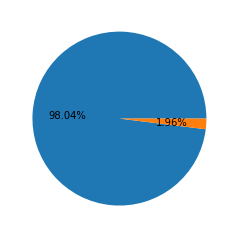

In [249]:
plt.pie(df.Cancelled.value_counts(), autopct='%.2f%%')

> There are 137,434 flights (1.96%) were cancelled.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!